In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from helper import *

# Loading datasets

In [2]:
df_trade_matrix = pd.read_csv('../data/Trade_DetailedTradeMatrix_E_All_Data.csv', encoding = 'ISO-8859-1')

/home/yasser/anaconda3/envs/ada/lib/python3.7/site-packages/IPython/core/interactiveshell.py:3058: DtypeWarning: Columns (10,12,14,16,18,20,22,24,26,28,30,32,34,36,38,40,42,44,46,48,50,52,54,56,58,60,62,64,66,68,70,72) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


In [3]:
df_crop_production = pd.read_csv('../data/Production_Crops_E_All_Data.csv', encoding = 'ISO-8859-1')

In [4]:
df_crop_production.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2013,Y2013F,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F
0,2,Afghanistan,221,"Almonds, with shell",5312,Area harvested,ha,NaN,NaN,NaN,...,14114.0,NaN,13703.0,NaN,14676.0,NaN,19481.0,NaN,19793.0,NaN
1,2,Afghanistan,221,"Almonds, with shell",5419,Yield,hg/ha,NaN,NaN,NaN,...,29910.0,Fc,19996.0,Fc,16521.0,Fc,16859.0,Fc,13788.0,Fc
2,2,Afghanistan,221,"Almonds, with shell",5510,Production,tonnes,NaN,NaN,NaN,...,42215.0,NaN,27400.0,NaN,24246.0,NaN,32843.0,NaN,27291.0,NaN
3,2,Afghanistan,711,"Anise, badian, fennel, coriander",5312,Area harvested,ha,NaN,M,NaN,...,18500.0,F,30000.0,F,25000.0,F,26019.0,Im,28873.0,Im
4,2,Afghanistan,711,"Anise, badian, fennel, coriander",5419,Yield,hg/ha,NaN,NaN,NaN,...,6757.0,Fc,7167.0,Fc,7200.0,Fc,6923.0,Fc,6830.0,Fc


In [5]:
df_production_ch = df_crop_production[df_crop_production['Area'] == 'Switzerland']
df_trade_ch = df_trade_matrix[df_trade_matrix['Reporter Countries'] == 'Switzerland']

In [6]:
df_production_ch.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1961,Y1961F,Y1962,...,Y2013,Y2013F,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F
31434,211,Switzerland,515,Apples,5312,Area harvested,ha,2700.0,F,4800.0,...,3993.0,NaN,3894.0,NaN,3863.0,NaN,3854.0,NaN,3806.0,NaN
31435,211,Switzerland,515,Apples,5419,Yield,hg/ha,999259.0,Fc,1000833.0,...,526243.0,Fc,594101.0,Fc,554621.0,Fc,589777.0,Fc,592805.0,Fc
31436,211,Switzerland,515,Apples,5510,Production,tonnes,269800.0,NaN,480400.0,...,210129.0,NaN,231343.0,NaN,214250.0,NaN,227300.0,NaN,225622.0,Im
31437,211,Switzerland,526,Apricots,5312,Area harvested,ha,NaN,M,NaN,...,702.0,NaN,708.0,NaN,709.0,NaN,721.0,NaN,736.0,NaN
31438,211,Switzerland,526,Apricots,5419,Yield,hg/ha,NaN,NaN,NaN,...,119587.0,Fc,150014.0,Fc,117969.0,Fc,128336.0,Fc,127993.0,Fc


In [7]:
df_trade_ch.head(10)

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Unit,Y1986,...,Y2013,Y2013F,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F
4470118,211,Switzerland,2,Afghanistan,231,Almonds shelled,5610,Import Quantity,tonnes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4470119,211,Switzerland,2,Afghanistan,231,Almonds shelled,5622,Import Value,1000 US$,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN
4470120,211,Switzerland,2,Afghanistan,1169,"Animals, live, non-food",5622,Import Value,1000 US$,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4470121,211,Switzerland,2,Afghanistan,527,"Apricots, dry",5610,Import Quantity,tonnes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4470122,211,Switzerland,2,Afghanistan,527,"Apricots, dry",5622,Import Value,1000 US$,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4470123,211,Switzerland,2,Afghanistan,633,"Beverages, non alcoholic",5610,Import Quantity,tonnes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4470124,211,Switzerland,2,Afghanistan,633,"Beverages, non alcoholic",5622,Import Value,1000 US$,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4470125,211,Switzerland,2,Afghanistan,633,"Beverages, non alcoholic",5910,Export Quantity,tonnes,NaN,...,15.0,NaN,28.0,NaN,28.0,NaN,NaN,NaN,NaN,NaN
4470126,211,Switzerland,2,Afghanistan,633,"Beverages, non alcoholic",5922,Export Value,1000 US$,NaN,...,57.0,NaN,104.0,NaN,86.0,NaN,NaN,NaN,NaN,NaN
4470127,211,Switzerland,2,Afghanistan,901,"Cheese, whole cow milk",5910,Export Quantity,tonnes,NaN,...,NaN,NaN,7.0,NaN,1.0,NaN,8.0,NaN,0.0,NaN


# EDA

Every quantity in the table is followed by a flag column. A flag indicates how the quantity was obtained:
- **F**: FAO estimate
- **Fc**: Calculated data
- **M**: Data not available
- **NaN**: Official data
- *: Non-official data
- **A**: Aggregate, may include official, semi-official, estimated or calculated data
- **B**: Balance
- **Im**: FAO data based on imputation methodology


The takeaway is that the data can be very inaccurate at times, so not all of the following computations will be a really portrait of the reality.
Another thing to take into account is when the flag is **M** we can just replace the non-available data with 0s.

### Align data start year

In [8]:
drop_columns = ['Y' + str(year) for year in range(1961, 1986)]
drop_columns += ['Y' + str(year) + 'F' for year in range(1961, 1986)]

In [9]:
df_production_ch = df_production_ch.drop(columns=drop_columns)

### Fill NaN corresponding to a **M** flag

In [10]:
def fill_with_zero(df, year_start, year_end):
    for year in range(year_start, year_end+1):
        column = 'Y' + str(year)
        column_f = column + 'F'
        condition = df[column_f] == 'M'
        df.loc[condition, column] = df.loc[condition, column].fillna(0)

In [11]:
year_start = 1986
year_end = 2017
fill_with_zero(df_production_ch, year_start, year_end)
fill_with_zero(df_trade_ch, year_start, year_end)

/home/yasser/anaconda3/envs/ada/lib/python3.7/site-packages/pandas/core/indexing.py:494: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


In [12]:
df_production_ch[df_production_ch['Y1986F']=='M'].head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1986,Y1986F,Y1987,...,Y2013,Y2013F,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F
31440,211,Switzerland,366,Artichokes,5312,Area harvested,ha,0.0,M,0.0,...,4.0,NaN,4.0,NaN,3.0,NaN,4.0,NaN,4.0,NaN
31442,211,Switzerland,366,Artichokes,5510,Production,tonnes,0.0,M,0.0,...,5.0,NaN,5.0,NaN,6.0,NaN,3.0,NaN,0.0,NaN
31443,211,Switzerland,367,Asparagus,5312,Area harvested,ha,0.0,M,0.0,...,332.0,NaN,371.0,NaN,380.0,NaN,413.0,NaN,397.0,NaN
31445,211,Switzerland,367,Asparagus,5510,Production,tonnes,0.0,M,0.0,...,613.0,NaN,805.0,NaN,679.0,NaN,611.0,NaN,722.0,NaN
31455,211,Switzerland,552,Blueberries,5312,Area harvested,ha,0.0,M,0.0,...,73.0,NaN,73.0,NaN,76.0,NaN,83.0,NaN,93.0,NaN


# Local Consumption and Exported Quantities

We're using Switzerland as Reporter country for the exporting quantities because we are interested in what really exited the country and not how much actually arrived to destination. Indeed, some of the exported goods might arrive to destination.

In [13]:
def prod_trade_elem(df_production, df_trade, item, unit):
    df_prod_elem = df_production[(df_production['Item'] == item) & (df_production['Unit'] == unit)]
    df_trade_elem = df_trade[(df_trade['Item'] == item) & (df_trade['Unit'] == unit)]
    return df_prod_elem, df_trade_elem

def local_consumption_weight(df_production_elem, df_trade_elem, year, item, print_opt):
    total_produced = df_prod_elem['Y'+str(year)].iloc[0]
    total_reported_exports = (df_trade_elem[df_trade_elem['Element'] == 'Export Quantity'])['Y'+str(year)].sum(skipna=True)
    total_reported_imports = (df_trade_elem[df_trade_elem['Element'] == 'Import Quantity'])['Y'+str(year)].sum(skipna=True)
    local_consumption = total_produced + total_reported_imports - total_reported_exports
    if print_opt:
        print(f"{item} for year {year}: \n\t- {total_produced} tonnes produced \n\t- {total_reported_imports} tonnes imported \n\t- {total_reported_exports} tonnes exported \n\t- {local_consumption} tonnes available for local consumption")
    else:
        return total_produced, total_reported_exports, total_reported_imports, local_consumption

In [14]:
local_pop_size = 7000000
item = 'Tomatoes'
year = 2017

df_prod_elem, df_trade_elem = prod_trade_elem(df_production_ch, df_trade_ch, item, 'tonnes')
local_consumption_weight(df_prod_elem, df_trade_elem, year, item, True)

Tomatoes for year 2017: 
	- 42533.0 tonnes produced 
	- 37238.0 tonnes imported 
	- 24.0 tonnes exported 
	- 79747.0 tonnes available for local consumption


In [17]:
def local_consumption_weight_plot(df_prod_elem, df_trade_elem, item, year_start, year_end, local_pop_size):
    produced = []
    imported = []
    exported = []
    consumption = []
    
    for year in range(year_start, year_end+1):
        total_produced, total_reported_exports, total_reported_imports, local_consumption = local_consumption_weight(df_prod_elem, df_trade_elem, year, item, print_opt=False)
        produced.append(total_produced)
        exported.append(total_reported_exports)
        imported.append(total_reported_imports)
        consumption.append(local_consumption)

    binwidth = 1
    fig, ax1 = plt.subplots()
    ax1.plot(range(year_start, year_end+1, binwidth), produced, label='Produced')
    ax1.plot(range(year_start, year_end+1, binwidth), exported, label='Exported')
    ax1.plot(range(year_start, year_end+1, binwidth), imported, label='Imported')
    ax1.plot(range(year_start, year_end+1, binwidth), consumption, label='Local Consumption')
    ax1.legend(loc='upper right')
    fig.set_size_inches(16, 8)
    plt.show()

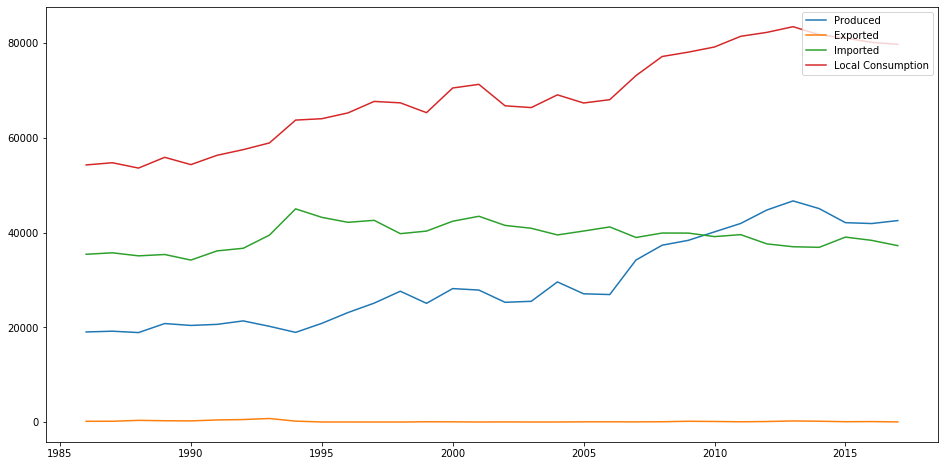

In [18]:
local_consumption_weight_plot(df_prod_elem, df_trade_elem, item, 1986, 2017, local_pop_size)

# Correlation between producer prices and imports

In [19]:
df_prices = pd.read_csv('../data/Prices_E_All_Data.csv', encoding = 'ISO-8859-1')

In [20]:
df_prices.head()

,Area Code,Area,Item Code,Item,Element Code,Element,Unit,Y1991,Y1991F,Y1992,...,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F,Y2018,Y2018F
0,2,Afghanistan,221,"Almonds, with shell",5530,Producer Price (LCU/tonne),LCU,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2,Afghanistan,221,"Almonds, with shell",5531,Producer Price (SLC/tonne),SLC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2,Afghanistan,515,Apples,5530,Producer Price (LCU/tonne),LCU,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2,Afghanistan,515,Apples,5531,Producer Price (SLC/tonne),SLC,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2,Afghanistan,526,Apricots,5530,Producer Price (LCU/tonne),LCU,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [21]:
df_prices_ch = df_prices[df_prices['Area'] == 'Switzerland']

In [22]:
df_prices_ch['Unit'].unique

<bound method Series.unique of 23328    LCU
23329    SLC
23330    USD
23331    LCU
23332    SLC
        ... 
23527    SLC
23528    USD
23529    LCU
23530    SLC
23531    USD
Name: Unit, Length: 204, dtype: object>

## Align start year and end year

In [23]:
drop_columns = ['Y' + str(year) for year in range(1986, 1991)]
drop_columns += ['Y' + str(year) + 'F' for year in range(1986, 1991)]
df_production_ch = df_production_ch.drop(columns=drop_columns)
df_trade_ch = df_trade_ch.drop(columns=drop_columns)

In [24]:
drop_columns = ['Y2018', 'Y2018F']
df_prices_ch = df_prices_ch.drop(columns=drop_columns)

## Fill NaN values with 0 if M flagged

In [25]:
year_start = 1991
year_end = 2017
fill_with_zero(df_production_ch, year_start, year_end)
fill_with_zero(df_trade_ch, year_start, year_end)
fill_with_zero(df_prices_ch, year_start, year_end)

## Plots

In [27]:
item = 'Tomatoes'
weight_unit = 'tonnes'
price_unit = 'USD'

df_prod_elem = df_production_ch[(df_production_ch['Item'] == item) & (df_production_ch['Unit'] == weight_unit)]
df_trade_weight_elem = df_trade_ch[(df_trade_ch['Item'] == item) & (df_trade_ch['Element'] == 'Import Quantity')]
df_trade_prices_elem = df_trade_ch[(df_trade_ch['Item'] == item) & (df_trade_ch['Element'] == 'Import Value')]
df_price_elem = df_prices_ch[(df_prices_ch['Item'] == item) & (df_prices_ch['Unit'] == price_unit)]

In [31]:
df_trade_prices_elem.head()

,Reporter Country Code,Reporter Countries,Partner Country Code,Partner Countries,Item Code,Item,Element Code,Element,Unit,Y1991,...,Y2013,Y2013F,Y2014,Y2014F,Y2015,Y2015F,Y2016,Y2016F,Y2017,Y2017F
4470462,211,Switzerland,3,Albania,388,Tomatoes,5610,Import Quantity,tonnes,180.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,36.0,NaN
4470703,211,Switzerland,4,Algeria,388,Tomatoes,5610,Import Quantity,tonnes,NaN,...,NaN,NaN,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4471621,211,Switzerland,9,Argentina,388,Tomatoes,5610,Import Quantity,tonnes,0.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4471875,211,Switzerland,1,Armenia,388,Tomatoes,5610,Import Quantity,tonnes,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,5.0,NaN
4472593,211,Switzerland,10,Australia,388,Tomatoes,5610,Import Quantity,tonnes,NaN,...,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
def prod_trade_prices_elem(df_production, df_trade, df_prices, item, weight_unit, price_unit):
    df_prod_elem = df_production[(df_production['Item'] == item) & (df_production['Unit'] == weight_unit)]
    df_trade_weight_elem = df_trade[(df_trade['Item'] == item) & (df_trade['Element'] == 'Import Quantity')]
    df_trade_prices_elem = df_trade[(df_trade['Item'] == item) & (df_trade['Element'] == 'Import Value')]
    df_price_elem = df_prices[(df_prices['Item'] == item) & (df_prices['Unit'] == price_unit)]
    return df_prod_elem, df_trade_weight_elem, df_trade_prices_elem, df_price_elem

def local_import_prices (df_prod_elem, df_trade_weight_elem, df_trade_prices_elem, df_price_elem, year, item):
    total_produced = df_prod_elem['Y'+str(year)].iloc[0]
    total_producer_prices = df_price_elem['Y'+str(year)].iloc[0]
    total_reported_imports_weight = df_trade_weight_elem['Y'+str(year)].sum(skipna=True)
    total_reported_imports_prices = df_trade_prices_elem['Y'+str(year)].sum(skipna=True)
    local_consumption = total_produced + total_reported_imports - total_reported_exports
    
    return total_produced, total_reported_exports, total_reported_imports, local_consumption

def local_consumption_weight_plot(df_prod_elem, df_trade_elem, item, year_start, year_end, local_pop_size):
    produced = []
    imported = []
    exported = []
    consumption = []
    
    for year in range(year_start, year_end+1):
        total_produced, total_reported_exports, total_reported_imports, local_consumption = local_consumption_weight(df_prod_elem, df_trade_elem, year, item, local_pop_size, print_opt=False)
        produced.append(total_produced)
        exported.append(total_reported_exports)
        imported.append(total_reported_imports)
        consumption.append(local_consumption)

    binwidth = 1
    fig, ax1 = plt.subplots()
    ax1.plot(range(year_start, year_end+1, binwidth), produced, label='Produced')
    ax1.plot(range(year_start, year_end+1, binwidth), exported, label='Exported')
    ax1.plot(range(year_start, year_end+1, binwidth), imported, label='Imported')
    ax1.plot(range(year_start, year_end+1, binwidth), consumption, label='Local Consumption')
    ax1.legend(loc='upper right')
    fig.set_size_inches(16, 8)
    plt.show()

In [ ]:
local_pop_size = 7000000
item = 'Tomatoes'
year = 2017

df_prod_elem, df_trade_elem = prod_trade_elem(df_production_ch, df_trade_ch, item, local_pop_size, 'tonnes')
local_consumption_weight(df_prod_elem, df_trade_elem, year, item, local_pop_size, True)